In [1]:
import numpy as np

In [2]:
# input
T = 10000 
max_cache_size = 100
files = 1000
locations = 2
caches = 2
action_dim = files * locations * caches + files * caches
l = np.array([[1]])

In [4]:
# main function
class LFUCache:

    def __init__(self, capacity: int):
        self.capacity = capacity  # 缓存最大容量
        self.minFreq = 0  # 记录当前的最小频次
        self.keyToVal = dict()  # KV表，key到val的映射，哈希表
        self.keyToFreq = dict()  # KF表，key到freq的映射，哈希表
        self.freqToKeys = dict()  # FK表，freq到key的映射，哈希表但其value为有序集(也用dict实现)

    def get(self, key: int) -> int:
        """如果关键字key存在于缓存中，则返回关键字的值并将freq加一，否则返回-1"""
        if key not in self.keyToVal.keys():
            return -1
        self.increaseFreq(key)  # 增加key对应的freq
        return self.keyToVal[key]

    def put(self, key: int, value: int) -> None:
        """如果key已存在，则更新value并将freq加一；
        如果不存在，则向缓存中插入该键值对，
        如果插入时元素数量超过capacity，则逐出freq最小的key(若有多个优先删除最旧的)"""
        if self.capacity <= 0:
            return
        if key in self.keyToVal.keys():
            self.keyToVal[key] = value
            self.increaseFreq(key)  # 增加key对应的freq
            return
        if self.capacity <= len(self.keyToVal):
            self.removeMinFreqKey()
        # 插入键值对，注意要同时更新三个表
        self.keyToVal[key] = value
        self.keyToFreq[key] = 1
        self.freqToKeys.setdefault(1, dict())  # 如果没有，则初始化映射freq到有序集(用dict实现)
        orderedSet = self.freqToKeys[1]
        orderedSet[key] = None  # 向有序集插入新key

        self.minFreq = 1  # 插入新key由，最小的freq必为1

    def increaseFreq(self, key):
        """key对应的freq加一，同时更新KF表和FK表"""
        freqNow = self.keyToFreq[key]
        # 更新KF表
        self.keyToFreq[key] = freqNow + 1

        # 更新FK表:将key从旧的freq对应的列表中删除
        self.freqToKeys[freqNow].pop(key)
        # 若删除后列表空了，移除旧的freq
        if len(self.freqToKeys[freqNow]) == 0:
            self.freqToKeys.pop(freqNow)
            # 若freqNow恰好是minFreq，应更新minFreq
            if freqNow == self.minFreq:
                self.minFreq += 1

        # 更新FK表:将key加入到freqNow+1对应的列表中
        self.freqToKeys.setdefault(freqNow + 1, dict())  # 如果没有，则初始化映射则初始化映射freq到有序集到有序集(用dict实现)
        orderedSet = self.freqToKeys[freqNow + 1]
        orderedSet[key] = None  # 向有序集插入新key
        return

    def removeMinFreqKey(self):
        """移除freq最小的key(若有多个优先删除最旧的)"""
        # freq最小的key列表
        keyList = self.freqToKeys[self.minFreq]  # 有序集，本质是一个有序字典
        # 其中应该删除最早插入的key
        deletedKey = list(keyList.keys())[0]

        # 更新KV表
        self.keyToVal.pop(deletedKey)

        # 更新KF表
        self.keyToFreq.pop(deletedKey)

        # 更新FK表
        keyList.pop(deletedKey)
        if len(keyList) == 0:
            self.freqToKeys.pop(self.minFreq)
            # 这里无需更新minFreq，因为removeMinFreqKey仅在put插入新元素时调用，put末尾必会将minFreq置为1
        return




LFU_caches = []
for items in range(0, caches):
  LFU_caches.append(LFUCache(capacity=max_cache_size))

utils = []
def cal_utility(locations,files,utils,LFU_caches):
      requested_location = np.random.randint(locations)
      requested_files = np.random.randint(files)
      ifin = LFU_caches[requested_location].get(requested_files)
      LFU_caches[requested_location].put(requested_files,requested_files)
      if ifin != -1:
        utils.append(1)
      else:
        utils.append(0)
      return utils, LFU_caches

In [6]:
# run LFU
utils_LFU = []
for t in range(1,T+1):
    uti,LFU_caches = cal_utility(locations,files,utils,LFU_caches)
    utils_LFU.append(sum(utils)/len(utils))

<function matplotlib.pyplot.show(*args, **kw)>

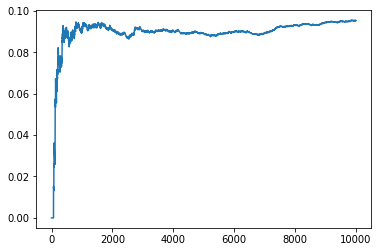

In [8]:
#LFU
import matplotlib.pyplot as plt
plt.plot(range(1,10000+1),utils_LFU)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

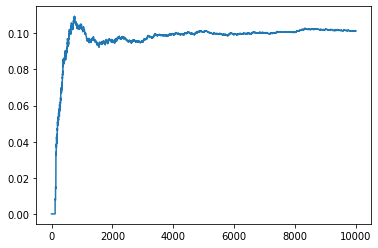

In [ ]:
#LRU
import matplotlib.pyplot as plt
plt.plot(range(1,10000+1),utils_LRU)
plt.show